In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import easyocr
import imutils

/Users/szokirov/opt/anaconda3/envs/myenv/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


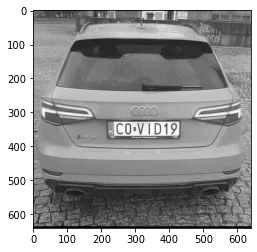

In [99]:
img = cv2.imread('/Users/szokirov/Downloads/f5aep5y2htm41.jpeg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

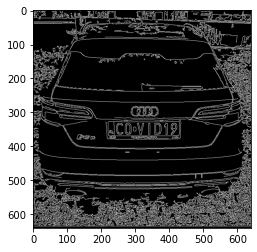

In [100]:
bfilter = cv2.bilateralFilter(gray, 11, 17, 17)
edged = cv2.Canny(bfilter, 30, 90)
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

In [101]:
key_contours = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(key_contours)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

In [102]:
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        location = approx
        break

In [103]:
location

array([[[220, 328]],

       [[227, 376]],

       [[429, 365]],

       [[429, 327]]], dtype=int32)

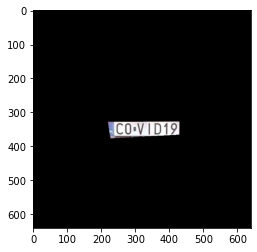

In [104]:
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0,255, -1)
new_image = cv2.bitwise_and(img, img, mask=mask)
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

In [105]:
(x,y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]

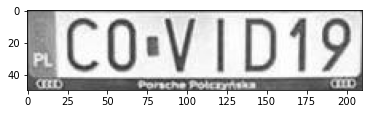

In [106]:
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))


In [107]:
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)
result
result[0][-2]


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


'COVID19'

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


True

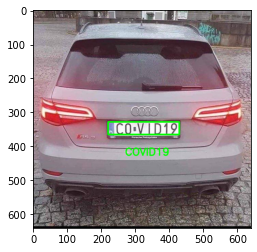

In [109]:
# results = []
# for i in range(0,2):
#     text = result[i][-2]
#     results.append(text)
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)
# result
# result[0][-2]

font = cv2.FONT_HERSHEY_SIMPLEX
res = cv2.putText(img, text=result[0][-2], org=(approx[0][0][0]+50, approx[1][0][1]+50), fontFace=font, fontScale=1, color=(0,255,0), thickness=2, lineType=cv2.LINE_AA)
res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0,255,0),3)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))
cv2.imwrite('tested.jpg', img)
